# PCA Lab

Up to this point, we've been looking at _supervised learning_. That is building
models using labeled data. This lab is the first step in using unsupervised
techniques. We're looking for characteristics or patterns that inherently arise
from the data itself.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Let's generate some random data...

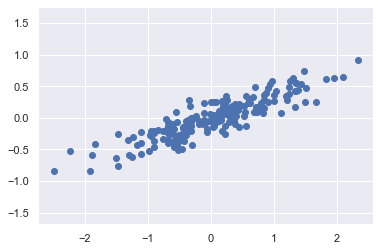

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

It's clear there's a linear relationship between X & Y. Let's explore this relationship
with PCA.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print("components:\n", pca.components_)
print("explained variance:\n", pca.explained_variance_)
print("mean:\n", pca.mean_)
print("covariance:\n", pca.get_covariance())

components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
explained variance:
 [0.7625315 0.0184779]
mean:
 [ 0.03351168 -0.00408072]
covariance:
 [[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


- `components` - these are the principal axes in feature space. The directions of maximum variance. These are your eigenvectors.
- `explained variance` - The amount of variance explained by each of the selected components. Equal to the largest eigenvalues of the covariance matrix of input vectors.
- `mean` - Per-feature empirical mean, estimated from the training set.
- `covariance` - estimated covariance of the training data


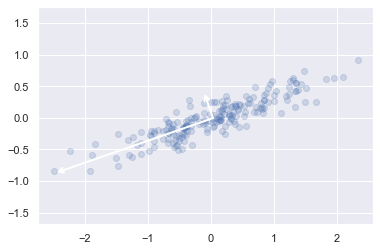

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');